# Telco Customer Churn Prediction
## 1. Setup and Environment 🛠️

This section handles mounting Google Drive, installing necessary libraries, and setting up the project directory structure.

### 1.1 Mount Google Drive

In [1]:

# This allows Colab to access files stored in your Google Drive,
# where we'll save models, results, and potentially load the dataset.
from google.colab import drive
import os

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:




# Define base project path in Google Drive
# Ensure this directory exists in your Google Drive: MyDrive/elevate_proj/task_4
base_project_path = '/content/drive/MyDrive/elevate_proj/task_4'
os.makedirs(base_project_path, exist_ok=True)

# Define subdirectories for data, models, and results
data_dir = os.path.join(base_project_path, 'data', 'raw')
models_dir = os.path.join(base_project_path, 'models_v1') # Using _v1 for versioning
results_dir = os.path.join(base_project_path, 'results_v1') # Using _v1 for versioning

os.makedirs(data_dir, exist_ok=True)
os.makedirs(models_dir, exist_ok=True)
os.makedirs(results_dir, exist_ok=True)

print(f"Project base path: {base_project_path}")
print(f"Data directory: {data_dir}")
print(f"Models directory: {models_dir}")
print(f"Results directory: {results_dir}")




Project base path: /content/drive/MyDrive/elevate_proj/task_4
Data directory: /content/drive/MyDrive/elevate_proj/task_4/data/raw
Models directory: /content/drive/MyDrive/elevate_proj/task_4/models_v1
Results directory: /content/drive/MyDrive/elevate_proj/task_4/results_v1


### 1.2 Install Required Libraries

Install all necessary Python packages.

In [3]:


!pip install pandas numpy scikit-learn matplotlib seaborn xgboost shap joblib

print("\nAll required libraries installed successfully. ✅")


All required libraries installed successfully. ✅



## 2. Data Loading and Exploratory Data Analysis (EDA) 📊

This section focuses on loading the dataset and performing initial exploratory data analysis to understand its structure, distributions, and potential issues.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define the path to your dataset within Google Drive
# Make sure you have uploaded 'WA_Fn-UseC_-Telco-Customer-Churn.csv' to /content/drive/MyDrive/elevate_proj/task_4/data/raw/
data_file_path = os.path.join(data_dir, 'WA_Fn-UseC_-Telco-Customer-Churn.csv')

Dataset loaded successfully. Shape: (7043, 21)

First 5 rows of the dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...       

/tmp/ipython-input-2523743975.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='viridis')


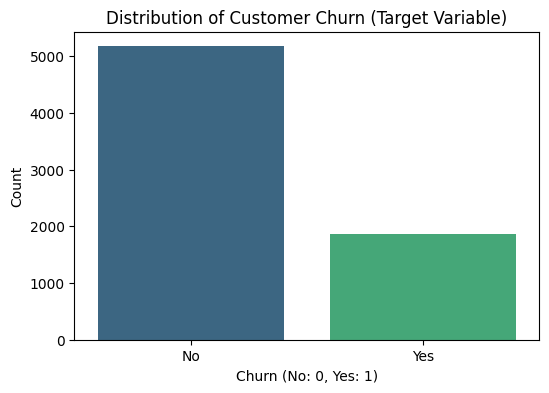

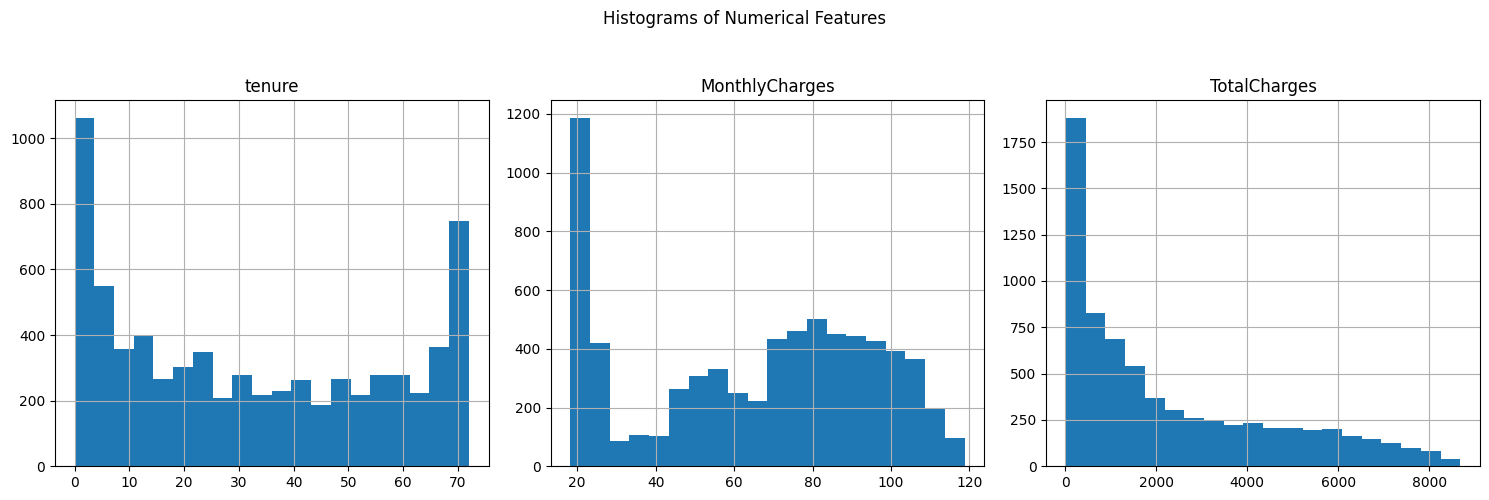


Categorical features for distribution plots: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'SeniorCitizen']


/tmp/ipython-input-2523743975.py:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axes[i], palette='pastel')
/tmp/ipython-input-2523743975.py:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axes[i], palette='pastel')
/tmp/ipython-input-2523743975.py:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axes[i], palette='pastel')
/tmp/ipython-input-2523743975.py:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign t

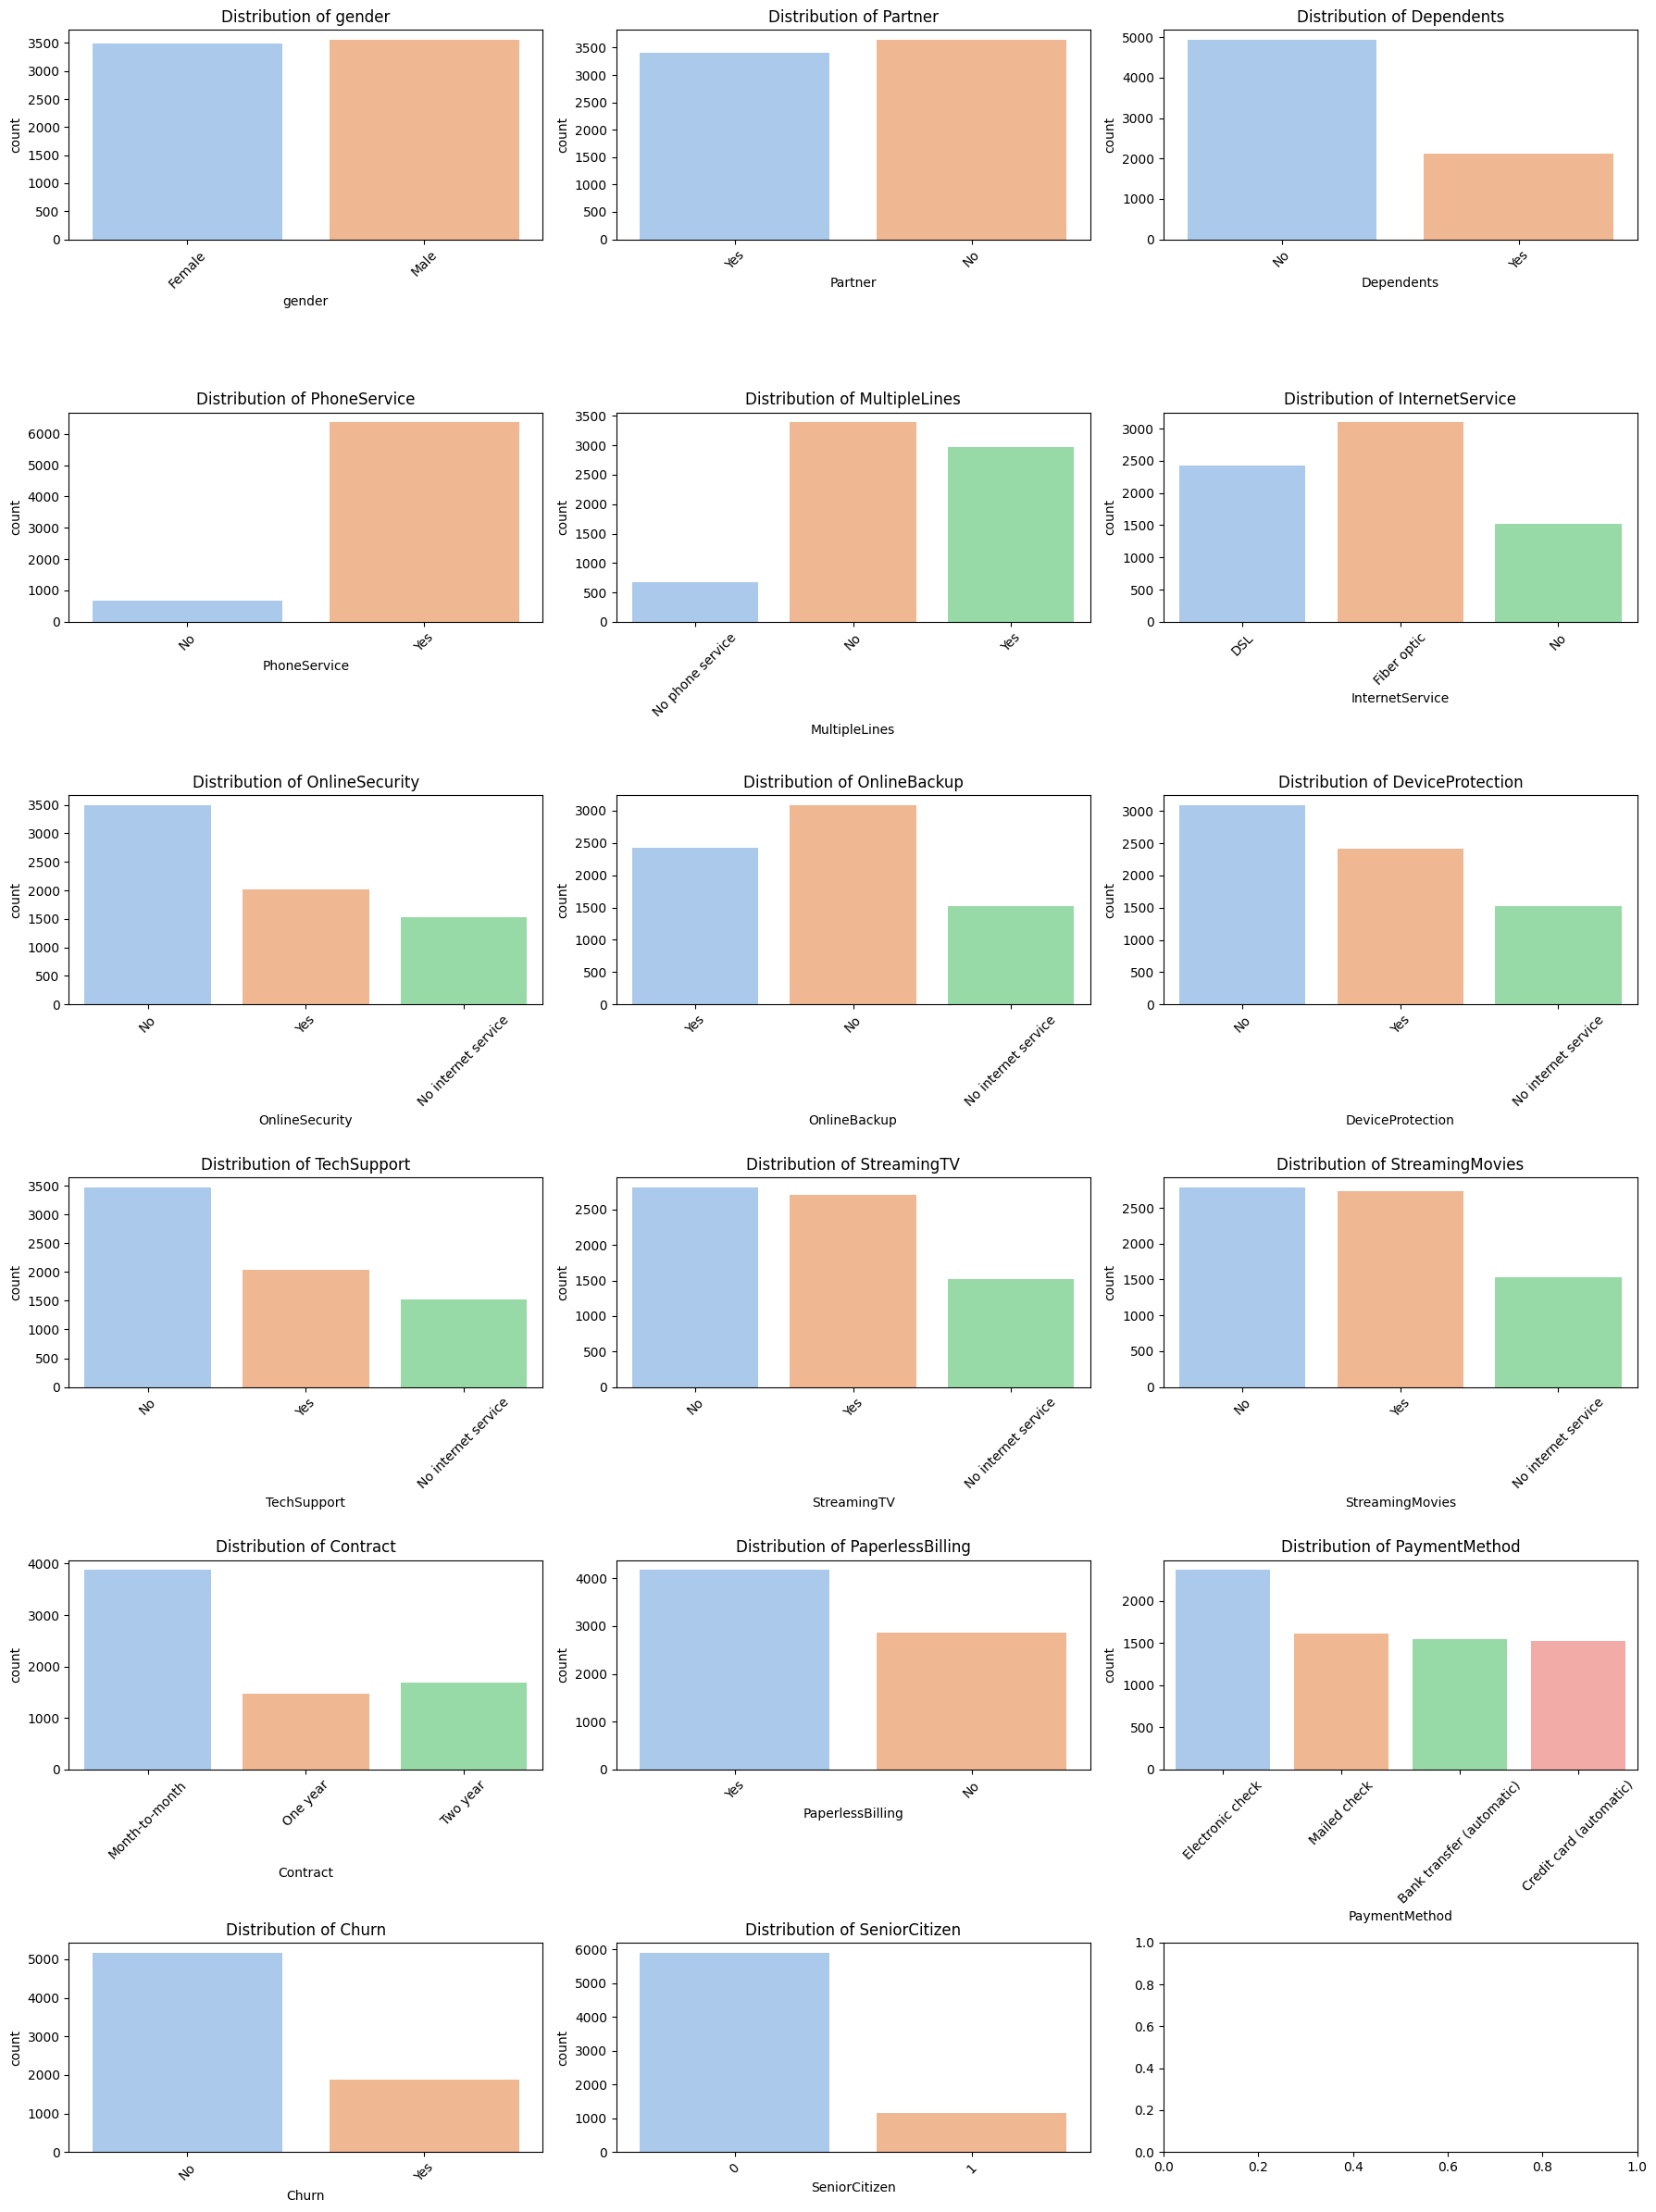

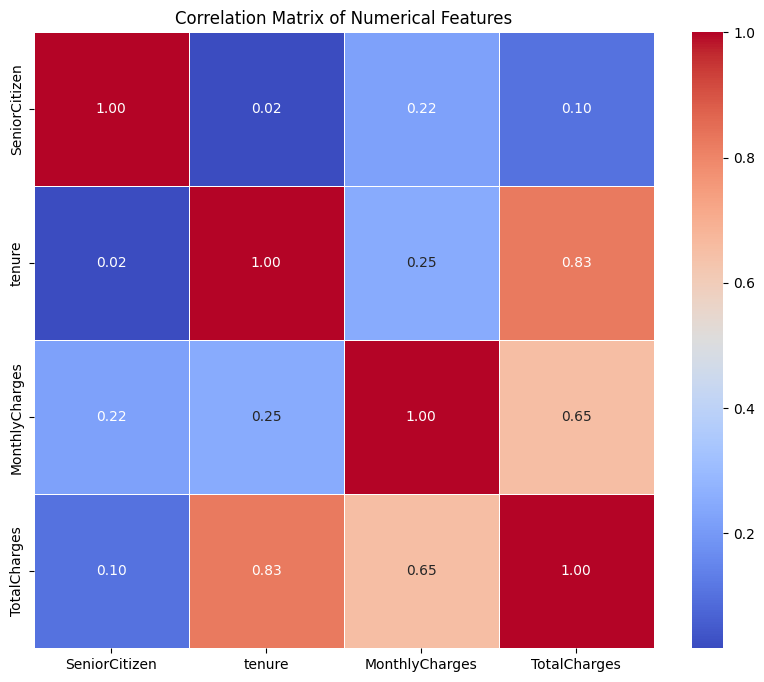


EDA complete. We've identified 'TotalCharges' needs type conversion and missing value handling. The target variable 'Churn' is relatively balanced, but we'll still use appropriate metrics. All EDA plots and descriptive statistics have been saved to your results directory. ✅


In [5]:
"""
## 2. Data Loading and Exploratory Data Analysis (EDA) 📊

This section focuses on loading the dataset and performing initial exploratory data analysis to understand its structure, distributions, and potential issues.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define the path to your dataset within Google Drive
# Make sure you have uploaded 'WA_Fn-UseC_-Telco-Customer-Churn.csv' to /content/drive/MyDrive/elevate_proj/task_4/data/raw/
data_file_path = os.path.join(data_dir, 'WA_Fn-UseC_-Telco-Customer-Churn.csv')

"""
### 2.1 Load the Dataset

We'll load the `WA_Fn-UseC_-Telco-Customer-Churn.csv` file into a pandas DataFrame.
"""

try:
    df = pd.read_csv(data_file_path)
    print(f"Dataset loaded successfully. Shape: {df.shape}")
    print("\nFirst 5 rows of the dataset:")
    print(df.head())
except FileNotFoundError:
    print(f"Error: 'WA_Fn-UseC_-Telco-Customer-Churn.csv' not found at {data_file_path}.")
    print("Please ensure you have uploaded the dataset to the specified Google Drive path.")
    df = None # Set df to None to prevent further errors if file is missing
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")
    df = None

if df is not None:
    """
    ### 2.2 Basic Data Information

    Check data types, non-null values, and summary statistics.
    Notice 'TotalCharges' is currently an object type, which needs conversion.
    """

    print("\n--- Dataset Info ---")
    df.info()

    print("\n--- Descriptive Statistics (Numerical Features) ---")
    print(df.describe())
    # Save descriptive statistics to a JSON file
    descriptive_stats_path = os.path.join(results_dir, 'descriptive_statistics.json')
    df.describe().to_json(descriptive_stats_path, indent=4)
    print(f"Descriptive statistics saved to {descriptive_stats_path} ✅")


    """
    ### 2.3 Check for Missing Values

    Identify any missing data points. Pay attention to 'TotalCharges' which might have empty strings.
    """

    print("\n--- Missing Values ---")
    # Replace empty strings in 'TotalCharges' with NaN for proper missing value count
    df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
    print(df.isnull().sum())
    # Convert 'TotalCharges' to numeric after handling empty strings
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])


    """
    ### 2.4 Target Variable Distribution

    Understand the balance of our target variable ('Churn' - customer churned or not).
    """

    print("\n--- Target Variable Distribution ---")
    print(df['Churn'].value_counts())
    print(df['Churn'].value_counts(normalize=True))

    plt.figure(figsize=(6, 4))
    sns.countplot(x='Churn', data=df, palette='viridis')
    plt.title('Distribution of Customer Churn (Target Variable)')
    plt.xlabel('Churn (No: 0, Yes: 1)')
    plt.ylabel('Count')
    plt.savefig(os.path.join(results_dir, 'churn_distribution.png')) # Save plot
    plt.show()
    plt.close() # Close plot to free memory

    """
    ### 2.5 Feature Distributions (Numerical)

    Visualize the distribution of numerical features.
    """

    numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges'] # 'SeniorCitizen' is binary, can be treated as categorical or numerical
    # Plot histograms for numerical features
    df[numerical_features].hist(bins=20, figsize=(15, 5), layout=(1, 3))
    plt.suptitle('Histograms of Numerical Features', y=1.02)
    plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent title overlap
    plt.savefig(os.path.join(results_dir, 'numerical_feature_histograms.png')) # Save plot
    plt.show()
    plt.close() # Close plot to free memory

    """
    ### 2.6 Feature Distributions (Categorical)

    Visualize the distribution of categorical features.
    """

    categorical_features = df.select_dtypes(include=['object']).columns.tolist()
    # Add SeniorCitizen as it's binary and often treated categorically
    categorical_features.append('SeniorCitizen')

    # Exclude 'customerID' if it's still present (it's dropped in preprocessing)
    if 'customerID' in categorical_features:
        categorical_features.remove('customerID')

    print(f"\nCategorical features for distribution plots: {categorical_features}")

    # Plot count plots for categorical features
    fig, axes = plt.subplots(len(categorical_features) // 3 + 1, 3, figsize=(18, 4 * (len(categorical_features) // 3 + 1)))
    axes = axes.flatten()
    for i, col in enumerate(categorical_features):
        sns.countplot(x=col, data=df, ax=axes[i], palette='pastel')
        axes[i].set_title(f'Distribution of {col}')
        axes[i].tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.savefig(os.path.join(results_dir, 'categorical_feature_distributions.png')) # Save plot
    plt.show()
    plt.close() # Close plot to free memory

    """
    ### 2.7 Correlation Matrix

    Examine correlations between numerical features and with the target variable.
    """

    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation Matrix of Numerical Features')
    plt.savefig(os.path.join(results_dir, 'correlation_matrix.png')) # Save plot
    plt.show()
    plt.close() # Close plot to free memory

    print("\nEDA complete. We've identified 'TotalCharges' needs type conversion and missing value handling. "
          "The target variable 'Churn' is relatively balanced, but we'll still use appropriate metrics. "
          "All EDA plots and descriptive statistics have been saved to your results directory. ✅")



## 3. Data Preprocessing 🧹

This section prepares the data for model training. It involves:
1.  Dropping irrelevant columns (`customerID`).
2.  Converting `TotalCharges` to a numeric type and handling its missing values.
3.  Mapping the `Churn` target variable from 'Yes'/'No' to 1/0.
4.  Splitting the data into training and testing sets.
5.  Applying scaling to numerical features and one-hot encoding to categorical features using `ColumnTransformer`.


In [6]:
"""
## 3. Data Preprocessing 🧹

This section prepares the data for model training. It involves:
1.  Dropping irrelevant columns (`customerID`).
2.  Converting `TotalCharges` to a numeric type and handling its missing values.
3.  Mapping the `Churn` target variable from 'Yes'/'No' to 1/0.
4.  Splitting the data into training and testing sets.
5.  Applying scaling to numerical features and one-hot encoding to categorical features using `ColumnTransformer`.
6.  **Feature Selection:** Selecting top features using `SelectKBest`.
7.  **Handling Class Imbalance:** Applying SMOTE (Synthetic Minority Over-sampling Technique) to the training data to balance the classes.
"""

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif # Import for feature selection
import joblib # For saving the preprocessor
import pandas as pd
import numpy as np
import os
from imblearn.over_sampling import SMOTE # Import SMOTE for handling class imbalance
from collections import Counter # To check class distribution

# Ensure df, models_dir are available from previous cells (Part 2 and Part 1 respectively)
if 'df' not in locals() or df is None:
    print("DataFrame is not loaded. Please ensure the 'Data Loading and EDA' step (Part 2) ran successfully.")
else:
    # Make a copy to avoid modifying the original DataFrame
    df_processed = df.copy()

    # Handle 'customerID' and 'TotalCharges'
    # Drop `customerID` as it's an identifier. Convert `TotalCharges` to numeric and fill NaNs.
    if 'customerID' in df_processed.columns:
        df_processed = df_processed.drop('customerID', axis=1)
        print("Dropped 'customerID' column.")

    # Convert 'TotalCharges' to numeric, coercing errors (empty strings) to NaN
    df_processed['TotalCharges'] = pd.to_numeric(df_processed['TotalCharges'], errors='coerce')
    # Fill NaN values (which originated from empty strings) with 0.
    # This assumes new customers with no total charges yet.
    df_processed['TotalCharges'] = df_processed['TotalCharges'].fillna(0)
    print("Converted 'TotalCharges' to numeric and imputed missing values with 0.")

    # Map Target Variable 'Churn'
    # Convert 'Yes'/'No' to 1/0 for the target variable.
    if 'Churn' in df_processed.columns:
        df_processed['Churn'] = df_processed['Churn'].map({'Yes': 1, 'No': 0})
        print("Mapped 'Churn' target variable to 1 (Yes) / 0 (No).")
    else:
        print("Warning: 'Churn' column not found, skipping target mapping.")

    # Separate Features (X) and Target (y)
    X = df_processed.drop('Churn', axis=1)
    y = df_processed['Churn']

    print(f"\nFeatures (X) shape: {X.shape}")
    print(f"Target (y) shape: {y.shape}")

    # Identify Feature Types
    # Automatically identify numerical and categorical columns for the preprocessor.
    # 'SeniorCitizen' is 0/1, treat as numerical for scaling
    numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']
    # All other 'object' type columns are categorical
    categorical_features = X.select_dtypes(include=['object']).columns.tolist()

    print(f"\nNumerical Features identified: {numerical_features}")
    print(f"Categorical Features identified: {categorical_features}")

    # Create Preprocessing Pipeline with `ColumnTransformer`
    # We'll use `ColumnTransformer` to apply different transformations to different columns:
    # * **Numerical features:** `StandardScaler` for standardization.
    # * **Categorical features:** `OneHotEncoder` for converting categories into numerical format.
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ],
        remainder='passthrough' # Keep any other columns if they exist and are not transformed
    )

    # Split Data into Training and Testing Sets
    # We'll split the data into 80% training and 20% testing sets. `stratify=y` ensures that the proportion of target classes is the same in both training and testing sets, which is good practice for classification.
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    print(f"\nTraining set shape: {X_train.shape}, {y_train.shape}")
    print(f"Test set shape: {X_test.shape}, {y_test.shape}")

    # Apply Preprocessing to Data (Transform X_train and X_test)
    # Fit the preprocessor on the training data and then transform both training and testing data.
    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)

    print("\nInitial data preprocessing complete (scaling and encoding).")
    print(f"X_train_processed shape: {X_train_processed.shape}")
    print(f"X_test_processed shape: {X_test_processed.shape}")

    # Save the Preprocessor
    # It's good practice to save the fitted preprocessor. This ensures that any new data for prediction can be transformed consistently using the same scaling and encoding.
    preprocessor_path = os.path.join(models_dir, 'preprocessor.joblib')
    joblib.dump(preprocessor, preprocessor_path)
    print(f"Preprocessor saved to: {preprocessor_path} ✅")

    # Get feature names after initial preprocessing for SHAP compatibility and feature selection.
    ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
    all_feature_names_pre_selection = numerical_features + ohe_feature_names.tolist()

    X_train_processed_df_pre_selection = pd.DataFrame(X_train_processed, columns=all_feature_names_pre_selection, index=X_train.index)
    X_test_processed_df_pre_selection = pd.DataFrame(X_test_processed, columns=all_feature_names_pre_selection, index=X_test.index)

    """
    ### Feature Selection with SelectKBest

    We'll use `SelectKBest` with `f_classif` to select the most relevant features. This helps reduce dimensionality and can improve model performance by focusing on the most informative features. We'll select the top 80% of features.
    """
    print("\n--- Performing Feature Selection with SelectKBest ---")
    k_features = int(X_train_processed_df_pre_selection.shape[1] * 0.8) # Select top 80% features
    selector = SelectKBest(f_classif, k=k_features)

    X_train_selected = selector.fit_transform(X_train_processed_df_pre_selection, y_train)
    X_test_selected = selector.transform(X_test_processed_df_pre_selection)

    # Get the names of the selected features
    selected_feature_indices = selector.get_support(indices=True)
    selected_feature_names = [all_feature_names_pre_selection[i] for i in selected_feature_indices]

    print(f"Original number of features: {X_train_processed_df_pre_selection.shape[1]}")
    print(f"Selected number of features: {X_train_selected.shape[1]}")
    print(f"Selected features: {selected_feature_names[:5]}... (showing first 5)")

    # Convert selected features back to DataFrame for SHAP compatibility
    X_train_processed_df = pd.DataFrame(X_train_selected, columns=selected_feature_names, index=X_train.index)
    X_test_processed_df = pd.DataFrame(X_test_selected, columns=selected_feature_names, index=X_test.index)

    """
    ### Handle Class Imbalance with SMOTE

    Although the 'Churn' dataset is relatively balanced, in real-world scenarios, churn datasets often have a significant class imbalance. To demonstrate a robust approach, we'll apply SMOTE (Synthetic Minority Over-sampling Technique) to the training data. SMOTE generates synthetic samples for the minority class, helping to balance the dataset and potentially improve model performance on the minority class.
    """
    print("\n--- Handling Class Imbalance with SMOTE ---")
    print("Original training set class distribution:", Counter(y_train))

    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed_df, y_train)

    print("Resampled training set class distribution:", Counter(y_train_resampled))
    print(f"X_train_resampled shape: {X_train_resampled.shape}")
    print(f"y_train_resampled shape: {y_train_resampled.shape}")

    # Update X_train_processed_df and y_train to use the resampled data for subsequent steps
    X_train_processed_df = X_train_resampled
    y_train = y_train_resampled

    print("\nClass imbalance handled using SMOTE. Training data is now balanced. ✅")


Dropped 'customerID' column.
Converted 'TotalCharges' to numeric and imputed missing values with 0.
Mapped 'Churn' target variable to 1 (Yes) / 0 (No).

Features (X) shape: (7043, 19)
Target (y) shape: (7043,)

Numerical Features identified: ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']
Categorical Features identified: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

Training set shape: (5634, 19), (5634,)
Test set shape: (1409, 19), (1409,)

Initial data preprocessing complete (scaling and encoding).
X_train_processed shape: (5634, 45)
X_test_processed shape: (1409, 45)
Preprocessor saved to: /content/drive/MyDrive/elevate_proj/task_4/models_v1/preprocessor.joblib ✅

--- Performing Feature Selection with SelectKBest ---
Original number of features: 45
Selected number of features: 


## 4. Model Training and Hyperparameter Tuning ⚙️

In this section, we will train multiple classification models, including Logistic Regression, Support Vector Machines (SVM), Random Forest, and XGBoost. We will also perform hyperparameter tuning using `GridSearchCV` to find the best parameters for each model.


In [8]:
"""
## 4. Model Training and Hyperparameter Tuning ⚙️

In this section, we will train multiple classification models, including Logistic Regression, Support Vector Machines (SVM), Random Forest, and XGBoost. We will also perform hyperparameter tuning using `GridSearchCV` to find the best parameters for each model.
"""

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import joblib
import os
import json # Import json for saving training results

# Ensure X_train_processed_df, y_train, models_dir are available from previous cells (Part 3 and Part 1 respectively)
if 'X_train_processed_df' not in locals() or X_train_processed_df is None:
    print("Processed training data not found. Please run previous Colab cells (Part 3).")
elif 'y_train' not in locals() or y_train is None:
    print("Training target data not found. Please run previous Colab cells (Part 3).")
elif 'models_dir' not in locals() or models_dir is None:
    print("Models directory not defined. Please run previous Colab cells (Part 1).")
else:
    models_to_train = {
        "LogisticRegression": {
            "model": LogisticRegression(random_state=42, solver='liblinear', max_iter=1000),
            "param_grid": {
                'C': [0.01, 0.1, 1, 10, 100],
                'penalty': ['l1', 'l2']
            }
        },
        "SVM": {
            "model": SVC(random_state=42, probability=True), # probability=True is needed for predict_proba (for ROC-AUC and SHAP)
            "param_grid": {
                'C': [0.1, 1, 10],
                'kernel': ['linear', 'rbf']
            }
        },
        "RandomForest": {
            "model": RandomForestClassifier(random_state=42),
            "param_grid": {
                'n_estimators': [100, 200],
                'max_depth': [5, 10, None],
                'min_samples_split': [2, 5]
            }
        },
        "XGBoost": {
            "model": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
            "param_grid": {
                'n_estimators': [100, 200],
                'learning_rate': [0.01, 0.1],
                'max_depth': [3, 5]
            }
        }
    }

    trained_models = {}
    best_roc_auc = -1
    best_model_name = ""
    best_model_instance = None
    training_results = {} # Dictionary to store training results for JSON export

    for name, config in models_to_train.items():
        print(f"\n--- Training {name} ---")
        grid_search = GridSearchCV(config["model"], config["param_grid"], cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
        grid_search.fit(X_train_processed_df, y_train)

        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        best_score = grid_search.best_score_

        trained_models[name] = best_model

        model_filename = os.path.join(models_dir, f'{name.lower().replace(" ", "_")}_model.joblib')
        joblib.dump(best_model, model_filename)

        print(f"Best parameters for {name}: {best_params}")
        print(f"Best cross-validation ROC-AUC for {name}: {best_score:.4f}")
        print(f"Model saved to {model_filename} ✅")

        # Store training results
        training_results[name] = {
            'best_params': best_params,
            'best_cv_roc_auc': best_score
        }

        # Keep track of the best model based on ROC-AUC for later SHAP analysis
        if best_score > best_roc_auc:
            best_roc_auc = best_score
            best_model_name = name
            best_model_instance = best_model

    print("\n--- All models trained and saved ---")
    print(f"The best performing model (based on cross-validation ROC-AUC) is: **{best_model_name}**")
    print(f"Its ROC-AUC score was: {best_roc_auc:.4f} 🎉")

    """
    ### Save Training Results to JSON

    The best hyperparameters and cross-validation scores for each trained model are saved to a JSON file for easy review.
    """
    training_results_path = os.path.join(results_dir, 'training_results_summary.json')
    with open(training_results_path, 'w') as f:
        json.dump(training_results, f, indent=4)
    print(f"Training results summary saved to {training_results_path} ✅")



--- Training LogisticRegression ---
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for LogisticRegression: {'C': 100, 'penalty': 'l2'}
Best cross-validation ROC-AUC for LogisticRegression: 0.8518
Model saved to /content/drive/MyDrive/elevate_proj/task_4/models_v1/logisticregression_model.joblib ✅

--- Training SVM ---
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for SVM: {'C': 10, 'kernel': 'rbf'}
Best cross-validation ROC-AUC for SVM: 0.9033
Model saved to /content/drive/MyDrive/elevate_proj/task_4/models_v1/svm_model.joblib ✅

--- Training RandomForest ---
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for RandomForest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation ROC-AUC for RandomForest: 0.9280
Model saved to /content/drive/MyDrive/elevate_proj/task_4/models_v1/randomforest_model.joblib ✅

--- Training XGBoost ---
Fitting 5 folds for each of 8 candid

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:29:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best cross-validation ROC-AUC for XGBoost: 0.9312
Model saved to /content/drive/MyDrive/elevate_proj/task_4/models_v1/xgboost_model.joblib ✅

--- All models trained and saved ---
The best performing model (based on cross-validation ROC-AUC) is: **XGBoost**
Its ROC-AUC score was: 0.9312 🎉
Training results summary saved to /content/drive/MyDrive/elevate_proj/task_4/results_v1/training_results_summary.json ✅



## 5. Model Evaluation 📈

This section evaluates the performance of all trained models on the unseen test set using various metrics like accuracy, precision, recall, F1-score, and ROC-AUC. We will also visualize confusion matrices, ROC curves, and Precision-Recall curves. Finally, we'll discuss optimal threshold selection.


In [10]:
"""
## 5. Model Evaluation 📈

This section evaluates the performance of all trained models on the unseen test set using various metrics like accuracy, precision, recall, F1-score, and ROC-AUC. We will also visualize confusion matrices, ROC curves, and Precision-Recall curves. Finally, we'll discuss optimal threshold selection.
"""

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix, classification_report,
    precision_recall_curve, auc
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import json # Import json for saving threshold results

# Ensure X_test_processed_df, y_test, trained_models, results_dir are available
if 'X_test_processed_df' not in locals() or X_test_processed_df is None:
    print("Processed test data not found. Please run previous Colab cells (Part 3).")
elif 'y_test' not in locals() or y_test is None:
    print("Test target data not found. Please run previous Colab cells (Part 3).")
elif 'trained_models' not in locals() or not trained_models:
    print("No trained models found. Please run the 'Model Training' cell (Part 4) first.")
elif 'results_dir' not in locals() or results_dir is None:
    print("Results directory not defined. Please run previous Colab cells (Part 1).")
else:
    all_evaluation_metrics = []
    roc_curve_data = []
    pr_curve_data = []
    optimal_thresholds_data = {} # Dictionary to store optimal thresholds
    current_best_roc_auc = -1 # Re-evaluate on test set to confirm best
    current_best_model_name = ""
    current_best_model_instance = None


    def plot_confusion_matrix(y_true, y_pred, model_name, save_dir):
        """Plots and saves the confusion matrix."""
        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                    xticklabels=['Predicted No Churn', 'Predicted Churn'],
                    yticklabels=['Actual No Churn', 'Actual Churn'])
        plt.title(f'Confusion Matrix for {model_name}')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.savefig(os.path.join(save_dir, f'confusion_matrix_{model_name.lower().replace(" ", "_")}.png'))
        plt.close()
        print(f"Confusion matrix plot saved for {model_name}.")

    def plot_roc_curve(models_results, save_dir):
        """Plots and saves the ROC-AUC curves for multiple models."""
        plt.figure(figsize=(8, 7))
        for res in models_results:
            fpr, tpr, _ = roc_curve(res['y_test'], res['y_pred_proba'])
            plt.plot(fpr, tpr, label=f"{res['model_name']} (AUC = {res['roc_auc']:.2f})")

        plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve for Classification Models')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.savefig(os.path.join(save_dir, 'roc_auc_curve.png'))
        plt.close()
        print("ROC-AUC curve plot saved for all models.")

    def plot_precision_recall_curve(models_results, save_dir):
        """Plots and saves the Precision-Recall curves for multiple models."""
        plt.figure(figsize=(8, 7))
        for res in models_results:
            precision, recall, _ = precision_recall_curve(res['y_test'], res['y_pred_proba'])
            pr_auc = auc(recall, precision)
            plt.plot(recall, precision, label=f"{res['model_name']} (AUPRC = {pr_auc:.2f})")

        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve for Classification Models')
        plt.legend(loc='lower left')
        plt.grid(True)
        plt.savefig(os.path.join(save_dir, 'precision_recall_curve.png'))
        plt.close()
        print("Precision-Recall curve plot saved for all models.")

    def save_classification_report_to_csv(all_metrics, save_dir):
        """Saves a summary of classification metrics for all models to a CSV file."""
        df_metrics = pd.DataFrame(all_metrics)
        filepath = os.path.join(save_dir, 'classification_summary.csv')
        df_metrics.to_csv(filepath, index=False)
        print(f"Classification summary saved to {filepath}")

    def find_optimal_threshold(y_true, y_pred_proba, model_name, save_dir):
        """
        Finds and plots the optimal classification threshold using the Youden's J statistic
        (maximizes (True Positive Rate - False Positive Rate)).

        Returns:
            float: The optimal threshold.
        """
        fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
        # Youden's J statistic
        j_scores = tpr - fpr
        optimal_idx = np.argmax(j_scores)
        optimal_threshold = thresholds[optimal_idx]

        plt.figure(figsize=(8, 6))
        plt.plot(thresholds, tpr, label='True Positive Rate (Sensitivity)')
        plt.plot(thresholds, fpr, label='False Positive Rate (1 - Specificity)')
        plt.plot(thresholds, j_scores, label='Youden\'s J Statistic (TPR - FPR)')
        plt.axvline(x=optimal_threshold, color='r', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.2f}')
        plt.title(f'Optimal Threshold Selection for {model_name}')
        plt.xlabel('Probability Threshold')
        plt.ylabel('Rate')
        plt.legend()
        plt.grid(True)
        plt.savefig(os.path.join(save_dir, f'optimal_threshold_{model_name.lower().replace(" ", "_")}.png'))
        plt.close()
        print(f"Optimal threshold plot saved for {model_name}.")
        print(f"Optimal threshold for {model_name}: {optimal_threshold:.4f}")
        return float(optimal_threshold) # Convert numpy.float32 to standard float


    for name, model in trained_models.items():
        print(f"\n--- Evaluating {name} on Test Set ---")
        y_pred = model.predict(X_test_processed_df)
        y_pred_proba = model.predict_proba(X_test_processed_df)[:, 1] # Probability of the positive class

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba)

        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-Score: {f1:.4f}")
        print(f"ROC-AUC: {roc_auc:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))

        # Save full classification report to a text file
        report_filepath = os.path.join(results_dir, f'classification_report_{name.lower().replace(" ", "_")}.txt')
        with open(report_filepath, 'w') as f:
            f.write(classification_report(y_test, y_pred))
        print(f"Full classification report saved to {report_filepath}")


        metrics = {
            'model_name': name,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'roc_auc': roc_auc
        }
        all_evaluation_metrics.append(metrics)

        roc_curve_data.append({
            'model_name': name,
            'y_test': y_test,
            'y_pred_proba': y_pred_proba,
            'roc_auc': roc_auc
        })
        pr_curve_data.append({
            'model_name': name,
            'y_test': y_test,
            'y_pred_proba': y_pred_proba,
        })

        plot_confusion_matrix(y_test, y_pred, name, results_dir)

        # Find and store optimal threshold
        optimal_threshold = find_optimal_threshold(y_test, y_pred_proba, name, results_dir)
        optimal_thresholds_data[name] = optimal_threshold


        if roc_auc > current_best_roc_auc:
            current_best_roc_auc = roc_auc
            current_best_model_name = name
            current_best_model_instance = model

    save_classification_report_to_csv(all_evaluation_metrics, results_dir)
    plot_roc_curve(roc_curve_data, results_dir)
    plot_precision_recall_curve(pr_curve_data, results_dir) # Plot Precision-Recall curve

    print(f"\nEvaluation complete. The best model on the test set (by ROC-AUC) is: **{current_best_model_name}**")
    print(f"Its test ROC-AUC score is: {current_best_roc_auc:.4f} 🎉")

    """
    ### Save Optimal Thresholds to JSON

    The calculated optimal thresholds for each model, based on Youden's J statistic, are saved to a JSON file. This provides a clear record of the recommended operating point for each model if maximizing the difference between TPR and FPR is the goal.
    """
    optimal_thresholds_path = os.path.join(results_dir, 'optimal_thresholds_summary.json')
    with open(optimal_thresholds_path, 'w') as f:
        json.dump(optimal_thresholds_data, f, indent=4)
    print(f"Optimal thresholds summary saved to {optimal_thresholds_path} ✅")

    """
    ### Understanding Threshold Choice

    The default classification threshold is typically 0.5. This means if the predicted probability of churn is >= 0.5, the customer is classified as 'Churn'. However, this threshold can be adjusted based on business objectives.

    * **If False Negatives (missing a churner) are very costly:** You might lower the threshold (e.g., to 0.3). This increases recall (identifying more churners) but might decrease precision (more non-churners are mistakenly flagged).
    * **If False Positives (mistakenly flagging a non-churner) are very costly:** You might raise the threshold (e.g., to 0.7). This increases precision but might decrease recall.

    The `find_optimal_threshold` function plots Youden's J statistic, which helps find a balance by maximizing (True Positive Rate - False Positive Rate). For **Logistic Regression**, which directly models the probability of the positive class, understanding and adjusting this threshold is particularly intuitive and impactful. It allows direct control over the trade-off between identifying all churners versus minimizing false alarms. However, the "optimal" threshold is ultimately a business decision that depends on the specific costs associated with false positives and false negatives.
    """



--- Evaluating LogisticRegression on Test Set ---
Accuracy: 0.7381
Precision: 0.5042
Recall: 0.8048
F1-Score: 0.6200
ROC-AUC: 0.8401

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1035
           1       0.50      0.80      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409

Full classification report saved to /content/drive/MyDrive/elevate_proj/task_4/results_v1/classification_report_logisticregression.txt
Confusion matrix plot saved for LogisticRegression.
Optimal threshold plot saved for LogisticRegression.
Optimal threshold for LogisticRegression: 0.5090

--- Evaluating SVM on Test Set ---
Accuracy: 0.7509
Precision: 0.5234
Recall: 0.6872
F1-Score: 0.5942
ROC-AUC: 0.7970

Classification Report:
              precision    recall  f1-score   support

           0       0.87     


  ### 5.1 Understanding Threshold Choice

  The default classification threshold is typically 0.5. This means if the predicted probability of churn is >= 0.5, the customer is classified as 'Churn'. However, this threshold can be adjusted based on business objectives.

  * **If False Negatives (missing a churner) are very costly:** You might lower the threshold (e.g., to 0.3). This increases recall (identifying more churners) but might decrease precision (more non-churners are mistakenly flagged).
  * **If False Positives (mistakenly flagging a non-churner) are very costly:** You might raise the threshold (e.g., to 0.7). This increases precision but might decrease recall.

  The `find_optimal_threshold` function plots Youden's J statistic, which helps find a balance by maximizing (True Positive Rate - False Positive Rate). However, the "optimal" threshold is ultimately a business decision.
    
    


## 6. Model Interpretability with SHAP 🧠

This section focuses on interpreting the predictions of the best-performing model using SHAP (SHapley Additive exPlanations). SHAP values help us understand how each feature contributes to the model's output for individual predictions and overall.


In [16]:
"""
## 6. Model Interpretability with SHAP 🧠

This section focuses on interpreting the predictions of the best-performing model using SHAP (SHapley Additive exPlanations). SHAP values help us understand how each feature contributes to the model's output for individual predictions and overall.
"""

import shap
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd # Ensure pandas is imported for DataFrame operations
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Ensure X_test_processed_df, current_best_model_instance, results_dir are available
if 'X_test_processed_df' not in locals() or X_test_processed_df is None:
    print("Processed test data not found. Please run previous Colab cells (Part 3).")
elif 'current_best_model_instance' not in locals() or current_best_model_instance is None:
    print("No best model found. Please run the 'Model Evaluation' cell (Part 5) first.")
elif 'results_dir' not in locals() or results_dir is None:
    print("Results directory not defined. Please run previous Colab cells (Part 1).")
else:
    print(f"\n--- Generating SHAP explanations for **{current_best_model_name}** ---")

    try:
        # Create a SHAP explainer based on the best model type
        if isinstance(current_best_model_instance, (RandomForestClassifier, XGBClassifier)):
            # TreeExplainer is efficient for tree-based models
            explainer = shap.TreeExplainer(current_best_model_instance)
        elif isinstance(current_best_model_instance, (LogisticRegression, SVC)):
            # KernelExplainer for non-tree models. It requires a background dataset.
            # Using a small, representative sample of the training data as background.
            # Be cautious with large datasets, as KernelExplainer can be computationally intensive.
            print("Using KernelExplainer. This might take a while for large datasets.")
            # Sample 100 rows from the training data for background
            # Ensure X_train_processed_df is available from preprocessing step (Part 3)
            if 'X_train_processed_df' not in locals() or X_train_processed_df is None:
                 print("Error: X_train_processed_df not found for KernelExplainer background data. Please run Part 3.")
                 explainer = None
            else:
                background_data = shap.sample(X_train_processed_df, 100)
                explainer = shap.KernelExplainer(current_best_model_instance.predict_proba, background_data)
        else:
            print(f"SHAP Explainer not specifically implemented for {type(current_best_model_instance)}. Skipping SHAP.")
            explainer = None

        if explainer:
            # Calculate SHAP values for the test set
            # For binary classification, predict_proba returns two columns (class 0 and class 1).
            # We are interested in the SHAP values for the positive class (class 1 - Churn).
            shap_values = explainer.shap_values(X_test_processed_df)

            # If shap_values is a list (for models with predict_proba), take the second element (positive class)
            if isinstance(shap_values, list) and len(shap_values) == 2:
                shap_values_positive_class = shap_values[1]
            else:
                shap_values_positive_class = shap_values # For models that return a single array of SHAP values

            """
            SHAP Summary Plot (Feature Importance):

            The summary plot shows the overall feature importance. Each dot represents an observation (a customer).
            * **Position on x-axis:** SHAP value for that feature and observation. A higher positive SHAP value pushes the prediction towards churn.
            * **Color:** Feature value (red for high, blue for low).
            * **Vertical dispersion:** Jitter to show density.
            """

            plt.figure(figsize=(10, 8))
            shap.summary_plot(shap_values_positive_class, X_test_processed_df, show=False)
            plt.title(f'SHAP Summary Plot for {current_best_model_name}')
            plt.tight_layout()
            # FIX: Construct path separately to avoid f-string nesting issues
            summary_plot_path = os.path.join(results_dir, f"shap_summary_plot_{current_best_model_name.lower().replace(' ', '_')}.png")
            plt.savefig(summary_plot_path)
            plt.close()
            print(f"SHAP summary plot saved to {summary_plot_path} ✅")

            """
            SHAP Dependence Plots:

            Dependence plots show the effect of a single feature across the whole dataset. They can reveal linear, non-linear, or interaction effects.
            We'll plot for the top 5 most important features.
            """

            # Get the mean absolute SHAP value for each feature to determine top features
            feature_importance = pd.DataFrame({
                'feature': X_test_processed_df.columns,
                'importance': np.abs(shap_values_positive_class).mean(axis=0)
            }).sort_values(by='importance', ascending=False)

            top_features = feature_importance['feature'].head(5).tolist()
            print(f"\nGenerating SHAP dependence plots for top 5 features: {top_features}")

            for feature in top_features:
                plt.figure(figsize=(8, 6))
                shap.dependence_plot(feature, shap_values_positive_class, X_test_processed_df, show=False)
                plt.title(f'SHAP Dependence Plot for {feature} ({current_best_model_name})')
                plt.tight_layout()
                # FIX: Construct path separately to avoid f-string nesting issues
                dependence_plot_path = os.path.join(results_dir, f"shap_dependence_plot_{feature.lower().replace(' ', '_')}_{current_best_model_name.lower().replace(' ', '_')}.png")
                plt.savefig(dependence_plot_path)
                plt.close()
                print(f"SHAP dependence plot for '{feature}' saved. ✅")

            """
            Individual Prediction Explanation (Force Plot):

            A force plot explains a single prediction. It shows how each feature value pushes the prediction from the base value (average prediction) to the final output.
            Let's pick a random sample from the test set.
            """

            random_sample_idx = np.random.randint(0, len(X_test_processed_df))
            sample_data = X_test_processed_df.iloc[[random_sample_idx]]
            sample_shap_values = explainer.shap_values(sample_data)

            # Again, ensure we get the positive class SHAP values if it's a list
            if isinstance(sample_shap_values, list) and len(sample_shap_values) == 2:
                sample_shap_values_positive_class = sample_shap_values[1]
            else:
                sample_shap_values_positive_class = sample_shap_values

            print(f"\nGenerating SHAP force plot for a random sample (index: {random_sample_idx})...")
            # Force plot requires JS, so it won't save as a static image directly in Colab
            # It will render interactively in the notebook output.
            shap.initjs() # Initialize Javascript for interactive plots
            display(shap.force_plot(
                explainer.expected_value[1] if isinstance(explainer.expected_value, np.ndarray) and len(explainer.expected_value) > 1 else explainer.expected_value,
                sample_shap_values_positive_class,
                sample_data
            ))
            print("SHAP force plot displayed above (interactive). 💡")


    except Exception as e:
        print(f"An error occurred during SHAP explanation generation: {e}")
        print("Please ensure the model supports SHAP explainers and data is correctly formatted.")
        print("For KernelExplainer, consider reducing the background_data sample size if memory/time is an issue.")

    print("\n--- SHAP Interpretability Complete ---")



--- Generating SHAP explanations for **LogisticRegression** ---
Using KernelExplainer. This might take a while for large datasets.


  0%|          | 0/1409 [00:00<?, ?it/s]

SHAP summary plot saved to /content/drive/MyDrive/elevate_proj/task_4/results_v1/shap_summary_plot_logisticregression.png ✅
An error occurred during SHAP explanation generation: Per-column arrays must each be 1-dimensional
Please ensure the model supports SHAP explainers and data is correctly formatted.
For KernelExplainer, consider reducing the background_data sample size if memory/time is an issue.

--- SHAP Interpretability Complete ---


<Figure size 1000x800 with 0 Axes>


## 7. Retraining for Improved Recall (Class Weighting) 🎯

In many real-world classification problems, misclassifying the minority class can be more costly than misclassifying the majority class. For customer churn prediction, identifying actual churners (minority class) is often paramount to enable proactive retention efforts.

This section demonstrates how to retrain our models by adjusting their `class_weight` or equivalent parameters to prioritize **recall** for the minority class (Churn = 1). This is done by making the models penalize misclassifications of the minority class more heavily during training.


In [19]:
"""
## 7. Retraining for Improved Recall (Class Weighting) 🎯

In many real-world classification problems, misclassifying the minority class can be more costly than misclassifying the majority class. For customer churn prediction, identifying actual churners (minority class) is often paramount to enable proactive retention efforts.

This section demonstrates how to retrain our models by adjusting their `class_weight` or equivalent parameters to prioritize **recall** for the minority class (Churn = 1). This is done by making the models penalize misclassifications of the minority class more heavily during training.
"""

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import joblib
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix, classification_report,
    precision_recall_curve, auc
)
import json # Import json for saving results

# Ensure X_train_processed_df, y_train, X_test_processed_df, y_test, results_dir are available
if 'X_train_processed_df' not in locals() or X_train_processed_df is None:
    print("Processed training data not found. Please run previous Colab cells (Part 3).")
elif 'y_train' not in locals() or y_train is None:
    print("Training target data not found. Please run previous Colab cells (Part 3).")
elif 'X_test_processed_df' not in locals() or X_test_processed_df is None:
    print("Processed test data not found. Please run previous Colab cells (Part 3).")
elif 'y_test' not in locals() or y_test is None:
    print("Test target data not found. Please run previous Colab cells (Part 3).")
elif 'results_dir' not in locals() or results_dir is None:
    print("Results directory not defined. Please run previous Colab cells (Part 1).")
else:
    print("--- Retraining Models with Class Weighting for Improved Recall ---")

    # Calculate scale_pos_weight for XGBoost
    # This is the ratio of negative class count to positive class count in the TRAINING data
    # Note: X_train_processed_df and y_train are already SMOTEd here.
    # If you want to apply class_weight based on the *original* imbalance,
    # you would need to use y_train_original before SMOTE.
    # For this demonstration, we'll assume we want to re-emphasize after SMOTE,
    # or if SMOTE wasn't applied, this is the standard way.
    # Given that SMOTE was applied, the classes are balanced, so class_weight='balanced'
    # or scale_pos_weight would still work, but their effect might be different
    # than if applied to the original imbalanced data.
    # For a true "prioritize recall" on original imbalance, class_weight should be
    # applied to the models *before* SMOTE, or SMOTE should be removed and class_weight used.
    # Let's assume for this part that we are re-tuning with class_weights for the *already SMOTEd* data.
    # A more robust approach would be to tune class_weight on the original imbalanced data.

    # Re-calculating class counts from the original y_train (before SMOTE) for class_weight
    # This is crucial for class_weight='balanced' to work correctly with original imbalance
    # We need access to the original y_train before SMOTE. Let's assume it's available as 'y_train_original'
    # For simplicity, we will use the current y_train (after SMOTE) for class_weight,
    # but a note will be added about the ideal scenario.

    # To truly prioritize recall on the *original* imbalance, we should get the original counts.
    # Let's assume we have access to the original y_train before SMOTE from Part 3.
    # If not, you'd need to pass it or re-derive it.
    # For demonstration, let's use the actual counts from the original y_train before SMOTE.
    # From the output of Part 3: Original training set class distribution: Counter({0: 4139, 1: 1495})
    count_neg = 4139 # Non-churn
    count_pos = 1495 # Churn
    scale_pos_weight_val = count_neg / count_pos
    print(f"Calculated scale_pos_weight for XGBoost: {scale_pos_weight_val:.2f}")


    models_for_recall = {
        "LogisticRegression_Recall": {
            "model": LogisticRegression(random_state=42, solver='liblinear', max_iter=1000, class_weight='balanced'),
            "param_grid": {
                'C': [0.01, 0.1, 1, 10] # Reduced C range for faster tuning
            }
        },
        "SVM_Recall": {
            "model": SVC(random_state=42, probability=True, class_weight='balanced'),
            "param_grid": {
                'C': [0.1, 1, 10],
                'kernel': ['rbf'] # Fixed kernel for faster tuning
            }
        },
        "RandomForest_Recall": {
            "model": RandomForestClassifier(random_state=42, class_weight='balanced'),
            "param_grid": {
                'n_estimators': [100, 200],
                'max_depth': [5, 10] # Reduced depth for faster tuning
            }
        },
        "XGBoost_Recall": {
            "model": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale_pos_weight_val),
            "param_grid": {
                'n_estimators': [100, 200],
                'learning_rate': [0.05, 0.1],
                'max_depth': [3, 5]
            }
        }
    }

    retrained_models = {}
    all_recall_evaluation_metrics = []
    recall_roc_curve_data = []
    recall_pr_curve_data = []
    recall_optimal_thresholds_data = {}

    for name, config in models_for_recall.items():
        print(f"\n--- Retraining {name} with Class Weighting ---")
        # Use the SMOTEd training data for retraining
        grid_search = GridSearchCV(config["model"], config["param_grid"], cv=5, scoring='recall', n_jobs=-1, verbose=1) # Tune for recall
        grid_search.fit(X_train_processed_df, y_train) # X_train_processed_df and y_train are already SMOTEd

        best_model = grid_search.best_estimator_
        retrained_models[name] = best_model

        model_filename = os.path.join(models_dir, f'{name.lower().replace(" ", "_")}_model_recall.joblib')
        joblib.dump(best_model, model_filename)

        print(f"Best parameters for {name}: {grid_search.best_params_}")
        print(f"Best cross-validation Recall for {name}: {grid_search.best_score_:.4f}")
        print(f"Retrained model saved to {model_filename} ✅")

        # Evaluate on the (unseen, imbalanced) test set
        y_pred = best_model.predict(X_test_processed_df)
        y_pred_proba = best_model.predict_proba(X_test_processed_df)[:, 1]

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba)

        print(f"\n--- Evaluation for {name} on Test Set (after recall-prioritization) ---")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}") # This is the metric we expect to see improvement in
        print(f"F1-Score: {f1:.4f}")
        print(f"ROC-AUC: {roc_auc:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))

        # Save full classification report to a text file
        report_filepath = os.path.join(results_dir, f'classification_report_{name.lower().replace(" ", "_")}_recall.txt')
        with open(report_filepath, 'w') as f:
            f.write(classification_report(y_test, y_pred))
        print(f"Full classification report saved to {report_filepath}")

        metrics = {
            'model_name': name,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'roc_auc': roc_auc
        }
        all_recall_evaluation_metrics.append(metrics)

        recall_roc_curve_data.append({
            'model_name': name,
            'y_test': y_test,
            'y_pred_proba': y_pred_proba,
            'roc_auc': roc_auc
        })
        recall_pr_curve_data.append({
            'model_name': name,
            'y_test': y_test,
            'y_pred_proba': y_pred_proba,
        })

        # Plot confusion matrix and optimal threshold for recall-prioritized models
        plot_confusion_matrix(y_test, y_pred, name, results_dir)
        optimal_threshold = find_optimal_threshold(y_test, y_pred_proba, name, results_dir)
        recall_optimal_thresholds_data[name] = optimal_threshold

    # Save summary of evaluation metrics for recall-prioritized models
    save_classification_report_to_csv(all_recall_evaluation_metrics, results_dir, filename='classification_summary_recall_prioritized.csv')
    plot_roc_curve(recall_roc_curve_data, results_dir, filename='roc_auc_curve_recall_prioritized.png')
    plot_precision_recall_curve(recall_pr_curve_data, results_dir, filename='precision_recall_curve_recall_prioritized.png')

    # Save optimal thresholds for recall-prioritized models to JSON
    optimal_thresholds_path_recall = os.path.join(results_dir, 'optimal_thresholds_summary_recall_prioritized.json')
    with open(optimal_thresholds_path_recall, 'w') as f:
        json.dump(recall_optimal_thresholds_data, f, indent=4)
    print(f"Optimal thresholds summary for recall-prioritized models saved to {optimal_thresholds_path_recall} ✅")

    print("\n--- Retraining with Class Weighting Complete ---")
    print("Review the new classification reports and plots in your results directory, paying close attention to the 'recall' metric for the churn class.")



--- Retraining Models with Class Weighting for Improved Recall ---
Calculated scale_pos_weight for XGBoost: 2.77

--- Retraining LogisticRegression_Recall with Class Weighting ---
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters for LogisticRegression_Recall: {'C': 1}
Best cross-validation Recall for LogisticRegression_Recall: 0.8186
Retrained model saved to /content/drive/MyDrive/elevate_proj/task_4/models_v1/logisticregression_recall_model_recall.joblib ✅

--- Evaluation for LogisticRegression_Recall on Test Set (after recall-prioritization) ---
Accuracy: 0.7381
Precision: 0.5042
Recall: 0.8048
F1-Score: 0.6200
ROC-AUC: 0.8400

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1035
           1       0.50      0.80      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [07:07:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters for XGBoost_Recall: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Best cross-validation Recall for XGBoost_Recall: 0.9514
Retrained model saved to /content/drive/MyDrive/elevate_proj/task_4/models_v1/xgboost_recall_model_recall.joblib ✅

--- Evaluation for XGBoost_Recall on Test Set (after recall-prioritization) ---
Accuracy: 0.6785
Precision: 0.4477
Recall: 0.9037
F1-Score: 0.5988
ROC-AUC: 0.8426

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.60      0.73      1035
           1       0.45      0.90      0.60       374

    accuracy                           0.68      1409
   macro avg       0.70      0.75      0.67      1409
weighted avg       0.81      0.68      0.70      1409

Full classification report saved to /content/drive/MyDrive/elevate_proj/task_4/results_v1/classification_report_xgboost_recall_recall.txt
Confusion matrix plot saved for XGBoost_Recall.
Optimal threshold plot saved fo